<a href="https://colab.research.google.com/github/Rustydinoco/ML_Learning/blob/master/Simple_Neural_Network_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [68]:

# Create a Model Class that inherit nn.Module

class Model(nn.Module):
# Input Layer = 4
# First Hidden Layer h1 = 6
# Second Hidden Layer h2 = 8
# output Layer = 3
  def __init__(self, in_features=4, h1=6, h2=8, out_features=3):
    super().__init__()
    self.fc1= nn.Linear(in_features, h1)
    self.fc2= nn.Linear(h1, h2)
    self.fc3= nn.Linear(h2, out_features)

# Activation the Linear with ReLU function
  def forward (self , x):
    x= F.relu(self.fc1(x))
    x= F.relu(self.fc2(x))
    x= self.fc3(x)
    return x



In [69]:
# Pick a Manual Seed for Randomizatibn
torch.manual_seed(41)
# Create an instance of Model
model= Model()

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
# Load Dataset
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)

In [72]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [73]:
# Replace Column species to Int
df['species']=df['species'].replace('setosa', 0.0)
df['species']=df['species'].replace('versicolor', 1.0)
df['species']=df['species'].replace('virginica', 2.0)

<ipython-input-73-59d610dec084>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species']=df['species'].replace('virginica', 2.0)


In [74]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [75]:
# Train Test Split
X = df.drop('species', axis= 1)
y = df['species']

In [76]:
# Convert These To Numpy Array
X = X.values
y = y.values

In [77]:
import sklearn.model_selection
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=41)

In [78]:
# Convert X features to Float Tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [79]:
# Convert y features to Long Tensor
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [80]:
# Set Criterion of the model to measure the error, how far off the the prediction are from the data
criterion = nn.CrossEntropyLoss() #https://medium.com/swlh/cross-entropy-loss-in-pytorch-c010faf97bab

# Choose Optimizer
# Using Adam Optimizer, lr = Learning Rate (if error doesnt go down after a bunch of iteration (epochs), lower the learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) #https://www.codecademy.com/resources/docs/pytorch/optimizers/adam

In [81]:
# Train The Model
epochs = 200
losses = []

for i in range(epochs):
  # Go forward and get the prediction
  y_pred = model.forward(X_train) # Get predicted result

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # Predicted values vs the y_train

  # keep Track of the losses
  losses.append(loss.detach().numpy())

  # Print every ten epochs
  if i % 10 == 0 :
    print(f'Epochs : {1} and loss : {loss}')

  # Do some propagation: take the eror rate of forward propagation and feed it back
  # thru the netwqork and fine tune the weights.
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epochs : 1 and loss : 1.1321529150009155
Epochs : 1 and loss : 0.9178270697593689
Epochs : 1 and loss : 0.6642837524414062
Epochs : 1 and loss : 0.45600810647010803
Epochs : 1 and loss : 0.37075573205947876
Epochs : 1 and loss : 0.2942723035812378
Epochs : 1 and loss : 0.19504274427890778
Epochs : 1 and loss : 0.10677831619977951
Epochs : 1 and loss : 0.06605347990989685
Epochs : 1 and loss : 0.04861659184098244
Epochs : 1 and loss : 0.040028925985097885
Epochs : 1 and loss : 0.03501606732606888
Epochs : 1 and loss : 0.03164667636156082
Epochs : 1 and loss : 0.02915382757782936
Epochs : 1 and loss : 0.02719087526202202
Epochs : 1 and loss : 0.025573644787073135
Epochs : 1 and loss : 0.02420089952647686
Epochs : 1 and loss : 0.02300945110619068
Epochs : 1 and loss : 0.02195768430829048
Epochs : 1 and loss : 0.02101610228419304


Text(0.5, 0, 'Epochs')

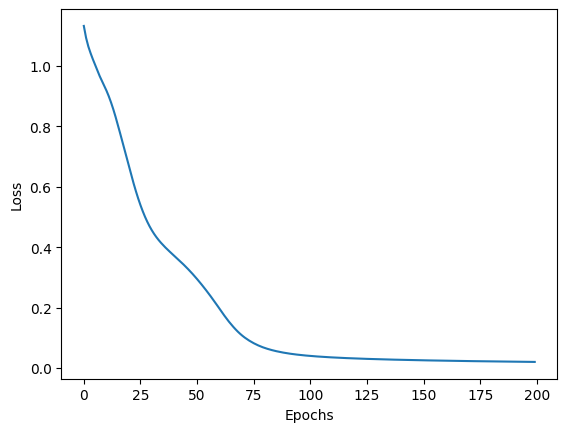

In [82]:
# Graph it
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')